In [30]:
import numpy as np 
import warnings
from tabulate import tabulate
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix ,classification_report
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import RandomOverSampler
import scipy.sparse
from scipy.stats import zscore
from sklearn.cluster import DBSCAN
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier
import math
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)
from sklearn.ensemble import BaggingClassifier
from scipy import stats
from scipy.stats import kruskal
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve

In [31]:
def plot_boxplots(data, columns_to_plot):
    
    plt.figure(figsize=(16, len(columns_to_plot) * 5))

    for i, column in enumerate(columns_to_plot, 1):
        plt.subplot(len(columns_to_plot), 1, i)
        sns.boxplot(data=data, x=column)
        plt.title(f"Box Plot of {column}")
        plt.xlabel(column)

    plt.tight_layout()
    plt.show()

In [32]:
def calculate_multiplier(highest_value, mean, std):
    if std == 0:
        return float('inf')  
    return math.floor((highest_value - mean) / std)

In [33]:
def calculate_highest_allowed(data, column):
    highest_allowed = data[column].mean() + analyze_columns(data, columns_to_analyze) * data[column].std()
    return highest_allowed

In [34]:
def plot_histograms(data, columns_to_plot):
   
    plt.figure(figsize=(16, len(columns_to_plot) * 5))

    for i, column in enumerate(columns_to_plot, 1):
        plt.subplot(len(columns_to_plot), 1, i)
        sns.histplot(data[column], kde=True)  
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)

    plt.tight_layout()
    plt.show()

In [35]:
def analyze_columns(data, columns_to_analyze):
    for column in columns_to_analyze:
        print(f"Statistics for {column}:")
        mean = data[column].mean()
        highest_value = data[column].max()
        std = data[column].std()
        min_value = data[column].min()
        lowest_value = min_value  
        
        actual_multiplier = (highest_value - mean) / std if std != 0 else 0
        
        rounded_multiplier = math.floor(actual_multiplier * 10) / 10  
        
        highest_allowed = mean + (rounded_multiplier * std if std != 0 else 0)
        lowest_allowed = max(mean - (rounded_multiplier * std if std != 0 else 0), 0)
        
        print(f"  Mean: {mean}")
        print(f"  Std: {std}")
        print(f"  Min: {min_value}")
        print(f"  Lowest Value: {lowest_value}")
        print(f"  Max: {highest_value}")
        print(f"  Actual Multiplier: {actual_multiplier:.2f}")
        print(f"  Rounded Multiplier: {rounded_multiplier}")
        print(f"  Highest Allowed: {highest_allowed}")
        print(f"  Lowest Allowed: {lowest_allowed}")
        print("-" * 40)

In [36]:
def analyze_and_remove_outliers(data, columns_to_analyze):
    data_2 = data.copy()  

    for column in columns_to_analyze:
        print(f"Analyzing column: {column}")
        mean = data[column].mean()
        highest_value = data[column].max()
        std = data[column].std()
        min_value = data[column].min()
        
        actual_multiplier = (highest_value - mean) / std if std != 0 else 0
        
        rounded_multiplier = math.floor(actual_multiplier * 10) / 10  
        
        highest_allowed = mean + (rounded_multiplier * std if std != 0 else 0)
        lowest_allowed = max(mean - (rounded_multiplier * std if std != 0 else 0), 0)
        
        print(f"  Mean: {mean}")
        print(f"  Std: {std}")
        print(f"  Min: {min_value}")
        print(f"  Max: {highest_value}")
        print(f"  Actual Multiplier: {actual_multiplier:.2f}")
        print(f"  Rounded Multiplier: {rounded_multiplier}")
        print(f"  Highest Allowed: {highest_allowed}")
        print(f"  Lowest Allowed: {lowest_allowed}")
        
        data_2 = data_2[
            (data_2[column] >= lowest_allowed) & 
            (data_2[column] <= highest_allowed)
        ]
        print(f"  Outliers removed for {column}. Remaining rows: {len(data_2)}")
        print("-" * 40)
    
    return data_2

In [37]:
def remove_outliers_zscore(data_2, columns_to_analyze, threshold=3.0):
    
    data_3 = data_2.copy()  

    for column in columns_to_analyze:
        print(f"Analyzing column: {column}")
        
        column_zscore = zscore(data_3[column], nan_policy='omit')
        
        outliers = (abs(column_zscore) > threshold)
        
        print(f"  Outliers detected in {column}: {outliers.sum()} rows")
        
        data_3 = data_3.loc[~outliers]
        print(f"  Remaining rows after removing outliers for {column}: {len(data_3)}")
        print("-" * 40)
    
    return data_3

In [38]:
def visualize_outliers(data, column_to_analyze, threshold=3.0):
    if column_to_analyze not in data.columns:
        raise ValueError(f"Column '{column_to_analyze}' not found in the dataset.")
    
    z_scores = zscore(data[column_to_analyze])
    outliers = abs(z_scores) > threshold
    original_data = data[column_to_analyze]
    cleaned_data = original_data[~outliers]

    plt.figure(figsize=(10, 6))

    plt.scatter(range(len(original_data)), original_data, label="Original Data", color="blue")

    plt.scatter(np.where(outliers)[0], original_data[outliers], label="Outliers", color="red", marker='x', s=100)

    plt.scatter(range(len(cleaned_data)), cleaned_data, label="Cleaned Data", color="green")

    plt.title(f"Datapoints and Outliers for '{column_to_analyze}'", fontsize=16)
    plt.xlabel("Index", fontsize=14)
    plt.ylabel("Value", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)

    plt.show()
    return data.loc[~outliers]

In [39]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1  
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return cleaned_df

In [40]:
data = pd.read_csv("loan_approval_dataset.csv")
data.shape
print(list(data.columns))
print(data.shape)
print(data.head)

['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']
(4269, 13)
<bound method NDFrame.head of       loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes   

In [41]:
data.isnull().mean()*100
data.columns = data.columns.str.strip()

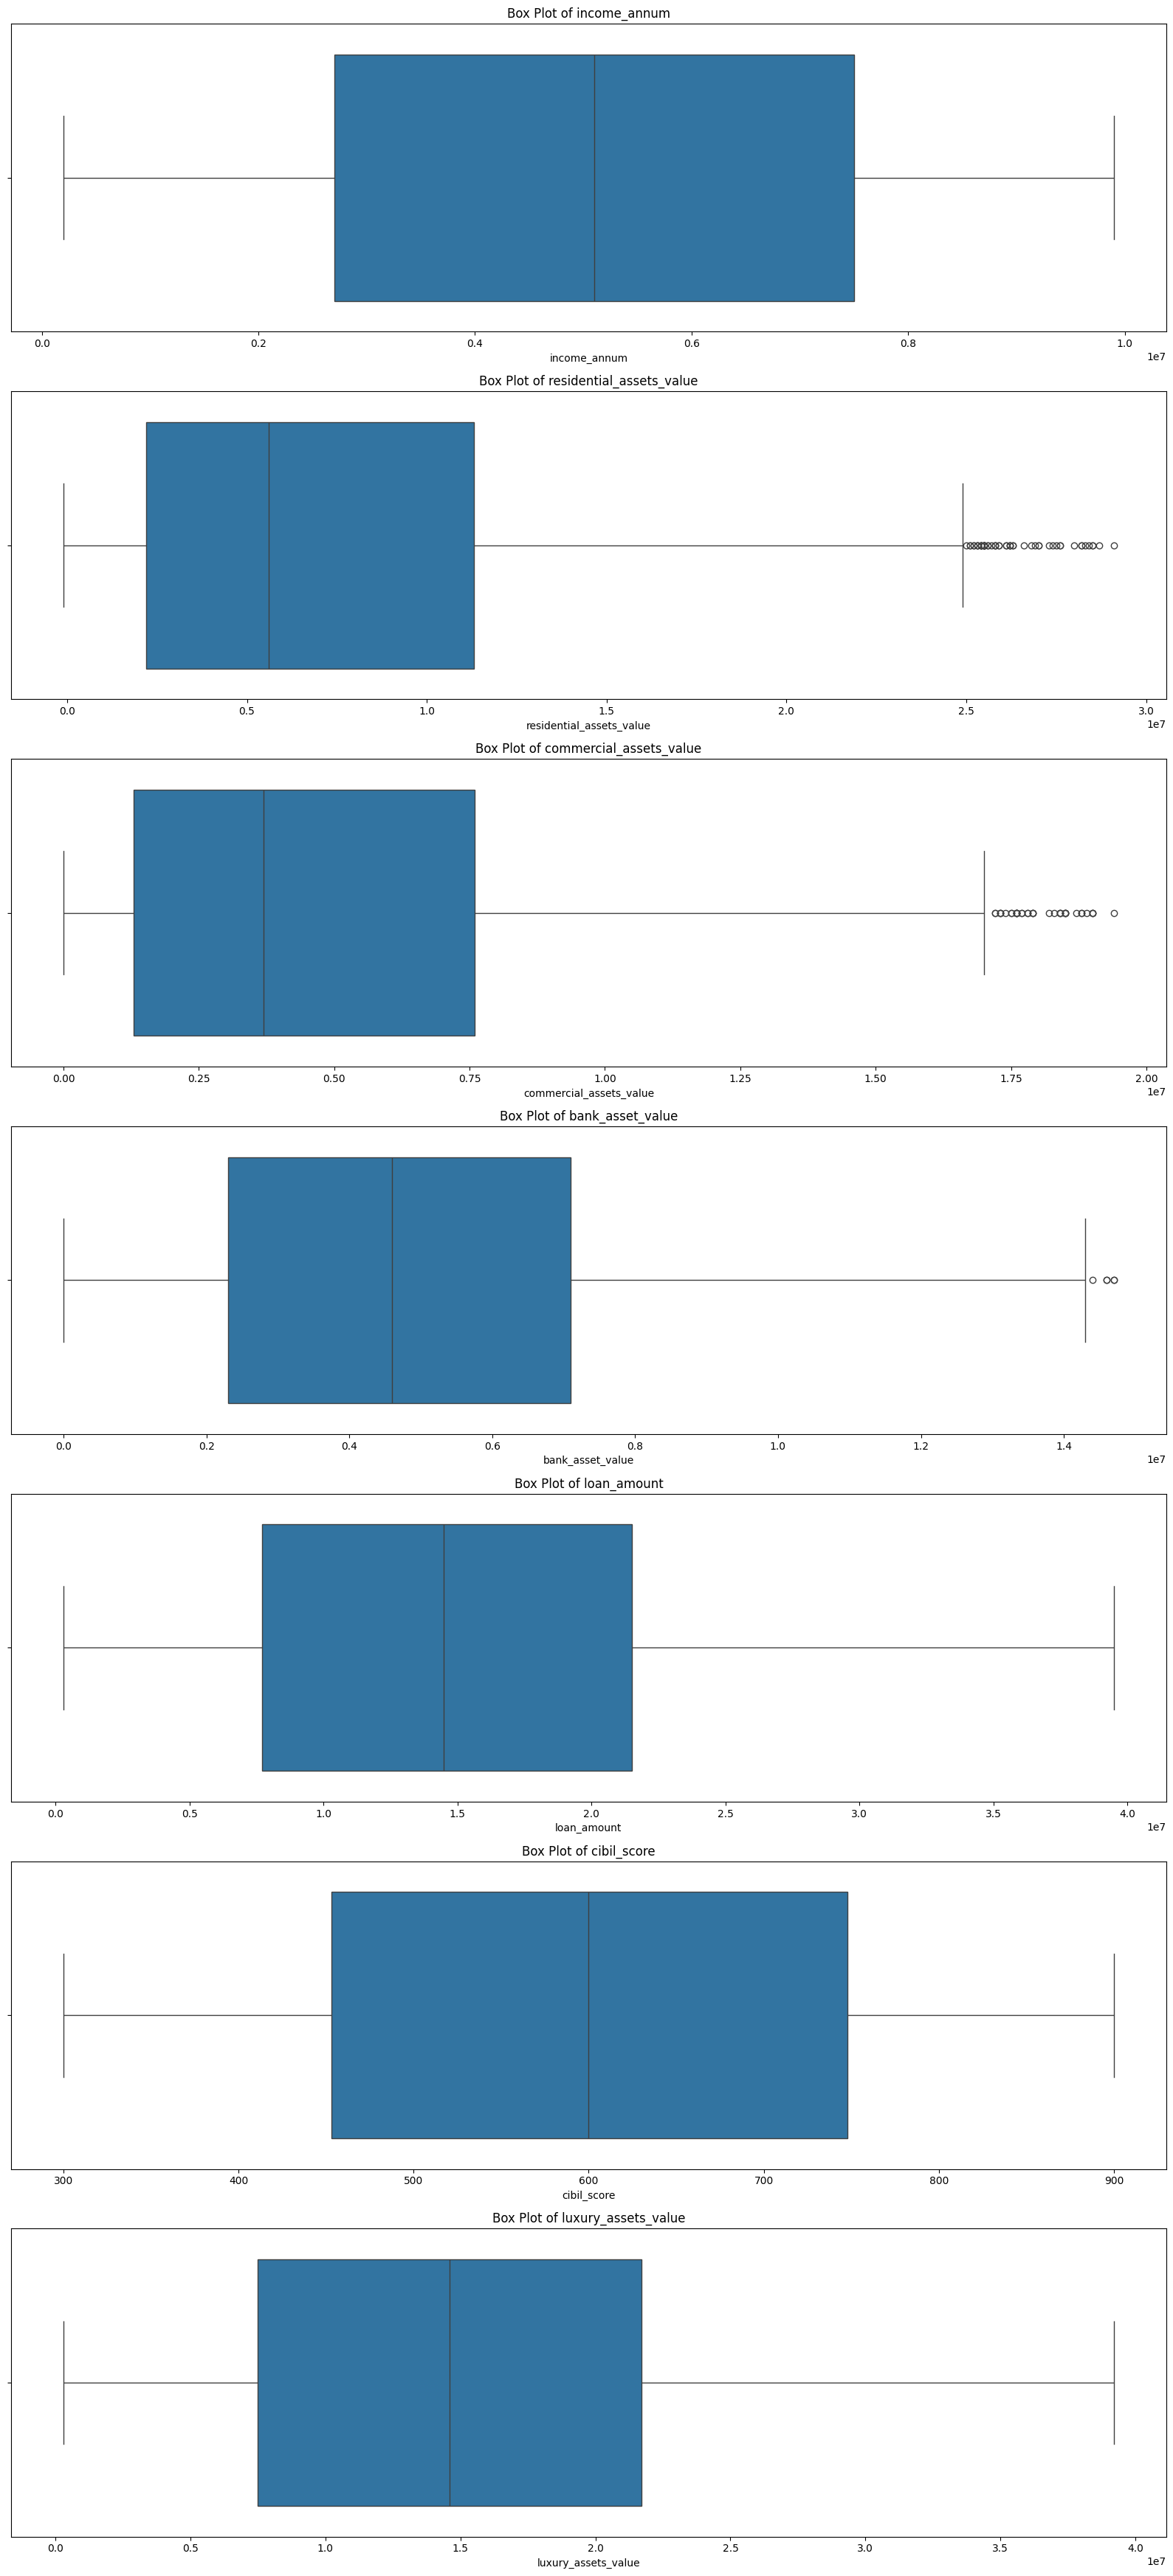

In [42]:
columns_to_plot = [
    'income_annum', 'residential_assets_value', 'commercial_assets_value',
    'bank_asset_value', 'loan_amount', 'cibil_score', 'luxury_assets_value'
]

plot_boxplots(data, columns_to_plot)

In [43]:
data = remove_outliers(data, 'residential_assets_value')
data = remove_outliers(data, 'commercial_assets_value')
data = remove_outliers(data, 'bank_asset_value')
data.shape

(4173, 13)

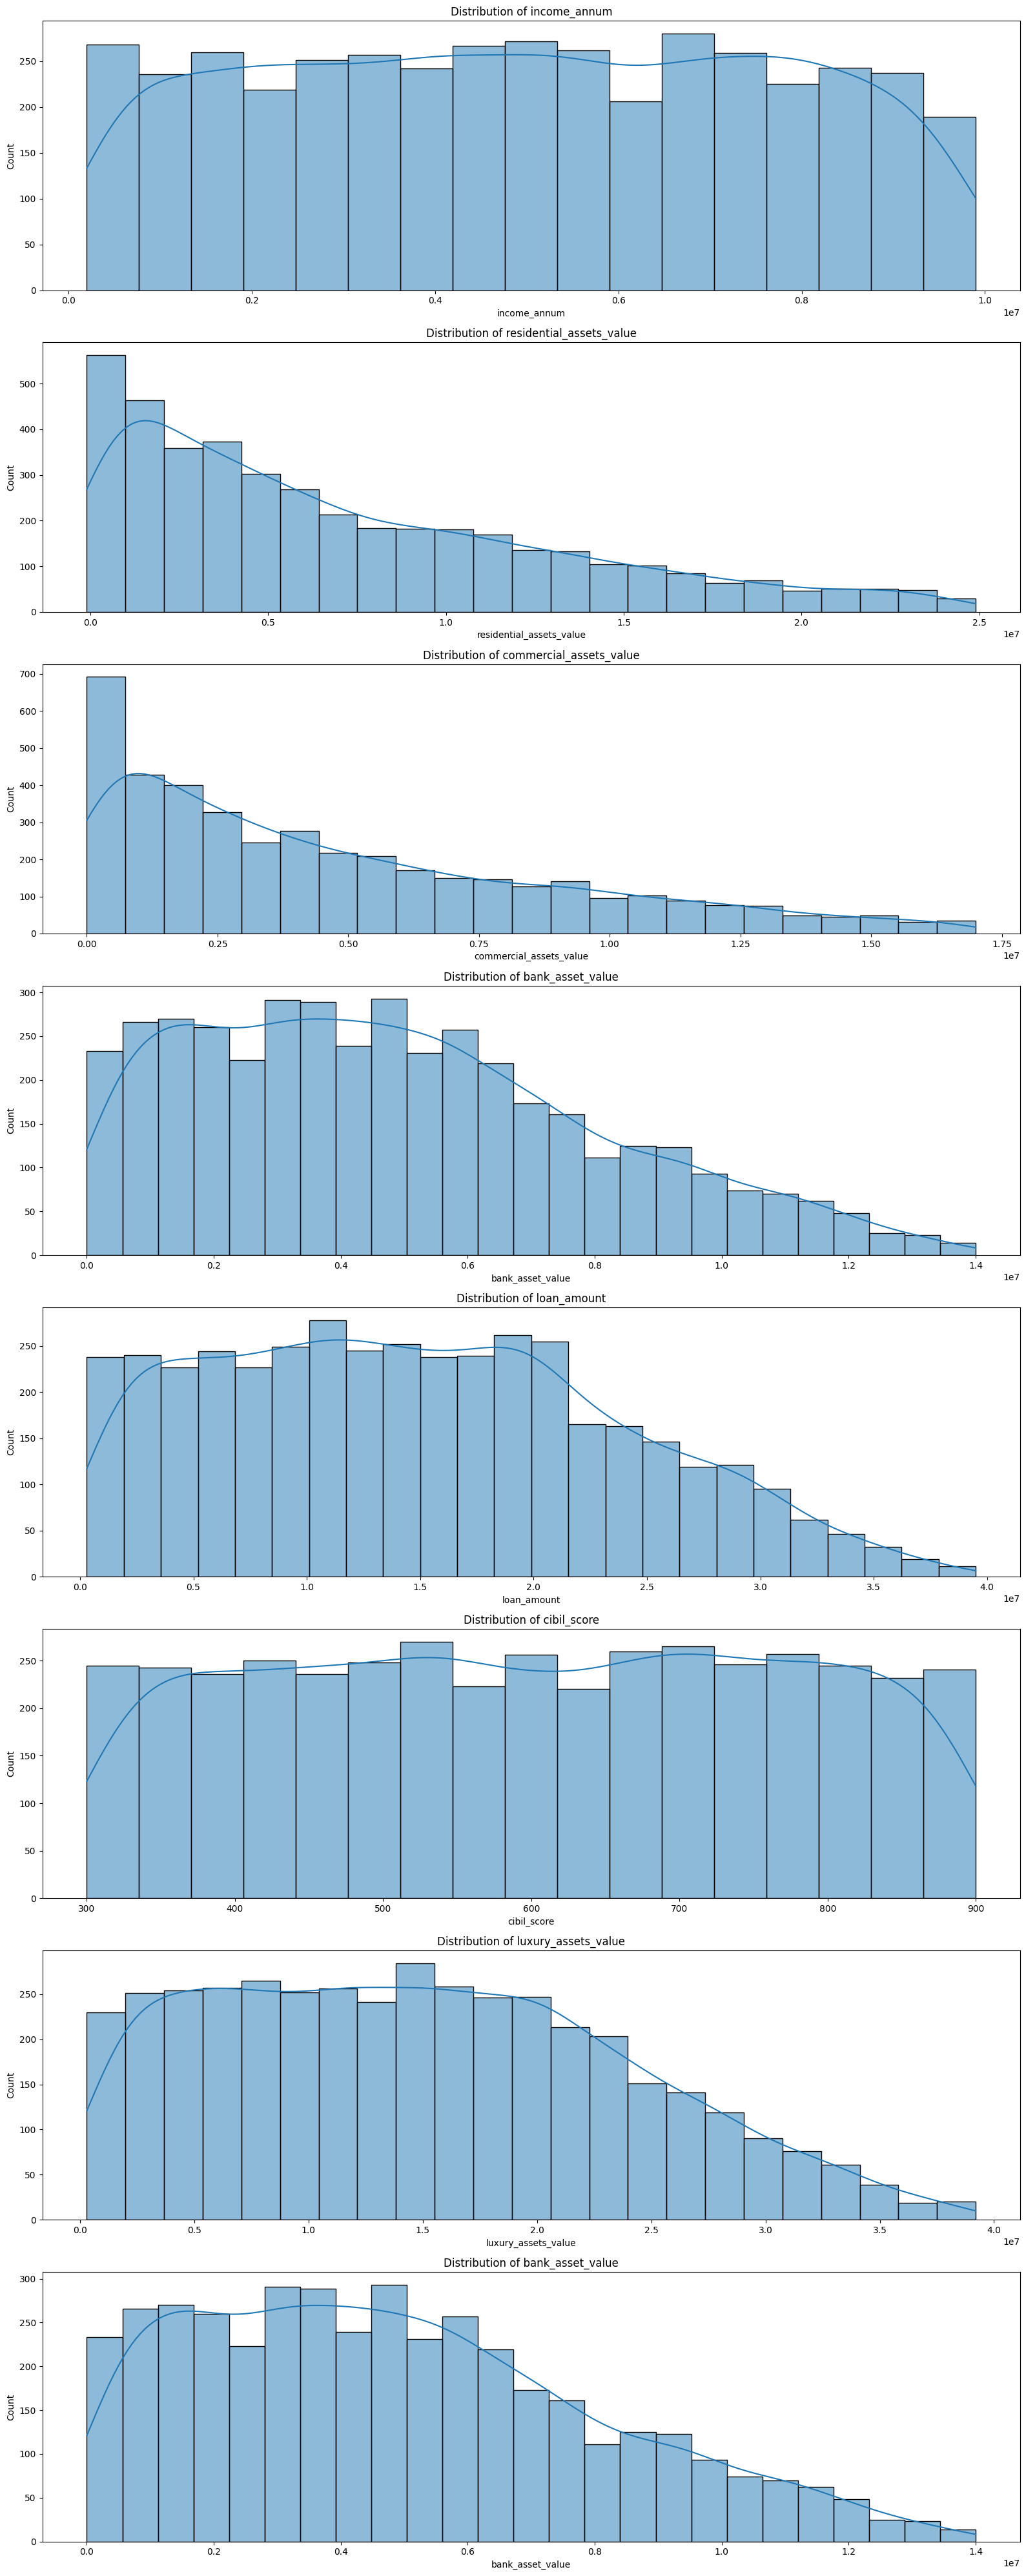

In [44]:
columns_to_plot = [
    'income_annum', 'residential_assets_value', 'commercial_assets_value',
    'bank_asset_value', 'loan_amount', 'cibil_score', 'luxury_assets_value', 'bank_asset_value'
]

plot_histograms(data, columns_to_plot)

In [45]:
columns_to_plot = [
    'income_annum', 'residential_assets_value', 'commercial_assets_value',
    'bank_asset_value', 'loan_amount', 'cibil_score', 'luxury_assets_value', 'bank_asset_value'
]

analyze_columns(data, columns_to_plot)

Statistics for income_annum:
  Mean: 4958686.796069974
  Std: 2758154.370768968
  Min: 200000
  Lowest Value: 200000
  Max: 9900000
  Actual Multiplier: 1.79
  Rounded Multiplier: 1.7
  Highest Allowed: 9647549.226377219
  Lowest Allowed: 269824.36576272827
----------------------------------------
Statistics for residential_assets_value:
  Mean: 7182362.808531033
  Std: 6136651.008089689
  Min: -100000
  Lowest Value: -100000
  Max: 24900000
  Actual Multiplier: 2.89
  Rounded Multiplier: 2.8
  Highest Allowed: 24364985.631182157
  Lowest Allowed: 0
----------------------------------------
Statistics for commercial_assets_value:
  Mean: 4818068.535825545
  Std: 4204860.608898725
  Min: 0
  Lowest Value: 0
  Max: 17000000
  Actual Multiplier: 2.90
  Rounded Multiplier: 2.8
  Highest Allowed: 16591678.240741976
  Lowest Allowed: 0
----------------------------------------
Statistics for bank_asset_value:
  Mean: 4863575.365444524
  Std: 3168140.6096054134
  Min: 0
  Lowest Value: 0
  Max:

In [46]:
columns_to_plot = [
    'income_annum', 'residential_assets_value', 'commercial_assets_value',
    'bank_asset_value', 'loan_amount', 'cibil_score', 'luxury_assets_value', 'bank_asset_value'
]

data_2 = analyze_and_remove_outliers(data, columns_to_plot)

print("Cleaned Data:")
print(data_2)

Analyzing column: income_annum
  Mean: 4958686.796069974
  Std: 2758154.370768968
  Min: 200000
  Max: 9900000
  Actual Multiplier: 1.79
  Rounded Multiplier: 1.7
  Highest Allowed: 9647549.226377219
  Lowest Allowed: 269824.36576272827
  Outliers removed for income_annum. Remaining rows: 4041
----------------------------------------
Analyzing column: residential_assets_value
  Mean: 7182362.808531033
  Std: 6136651.008089689
  Min: -100000
  Max: 24900000
  Actual Multiplier: 2.89
  Rounded Multiplier: 2.8
  Highest Allowed: 24364985.631182157
  Lowest Allowed: 0
  Outliers removed for residential_assets_value. Remaining rows: 4004
----------------------------------------
Analyzing column: commercial_assets_value
  Mean: 4818068.535825545
  Std: 4204860.608898725
  Min: 0
  Max: 17000000
  Actual Multiplier: 2.90
  Rounded Multiplier: 2.8
  Highest Allowed: 16591678.240741976
  Lowest Allowed: 0
  Outliers removed for commercial_assets_value. Remaining rows: 3989
---------------------

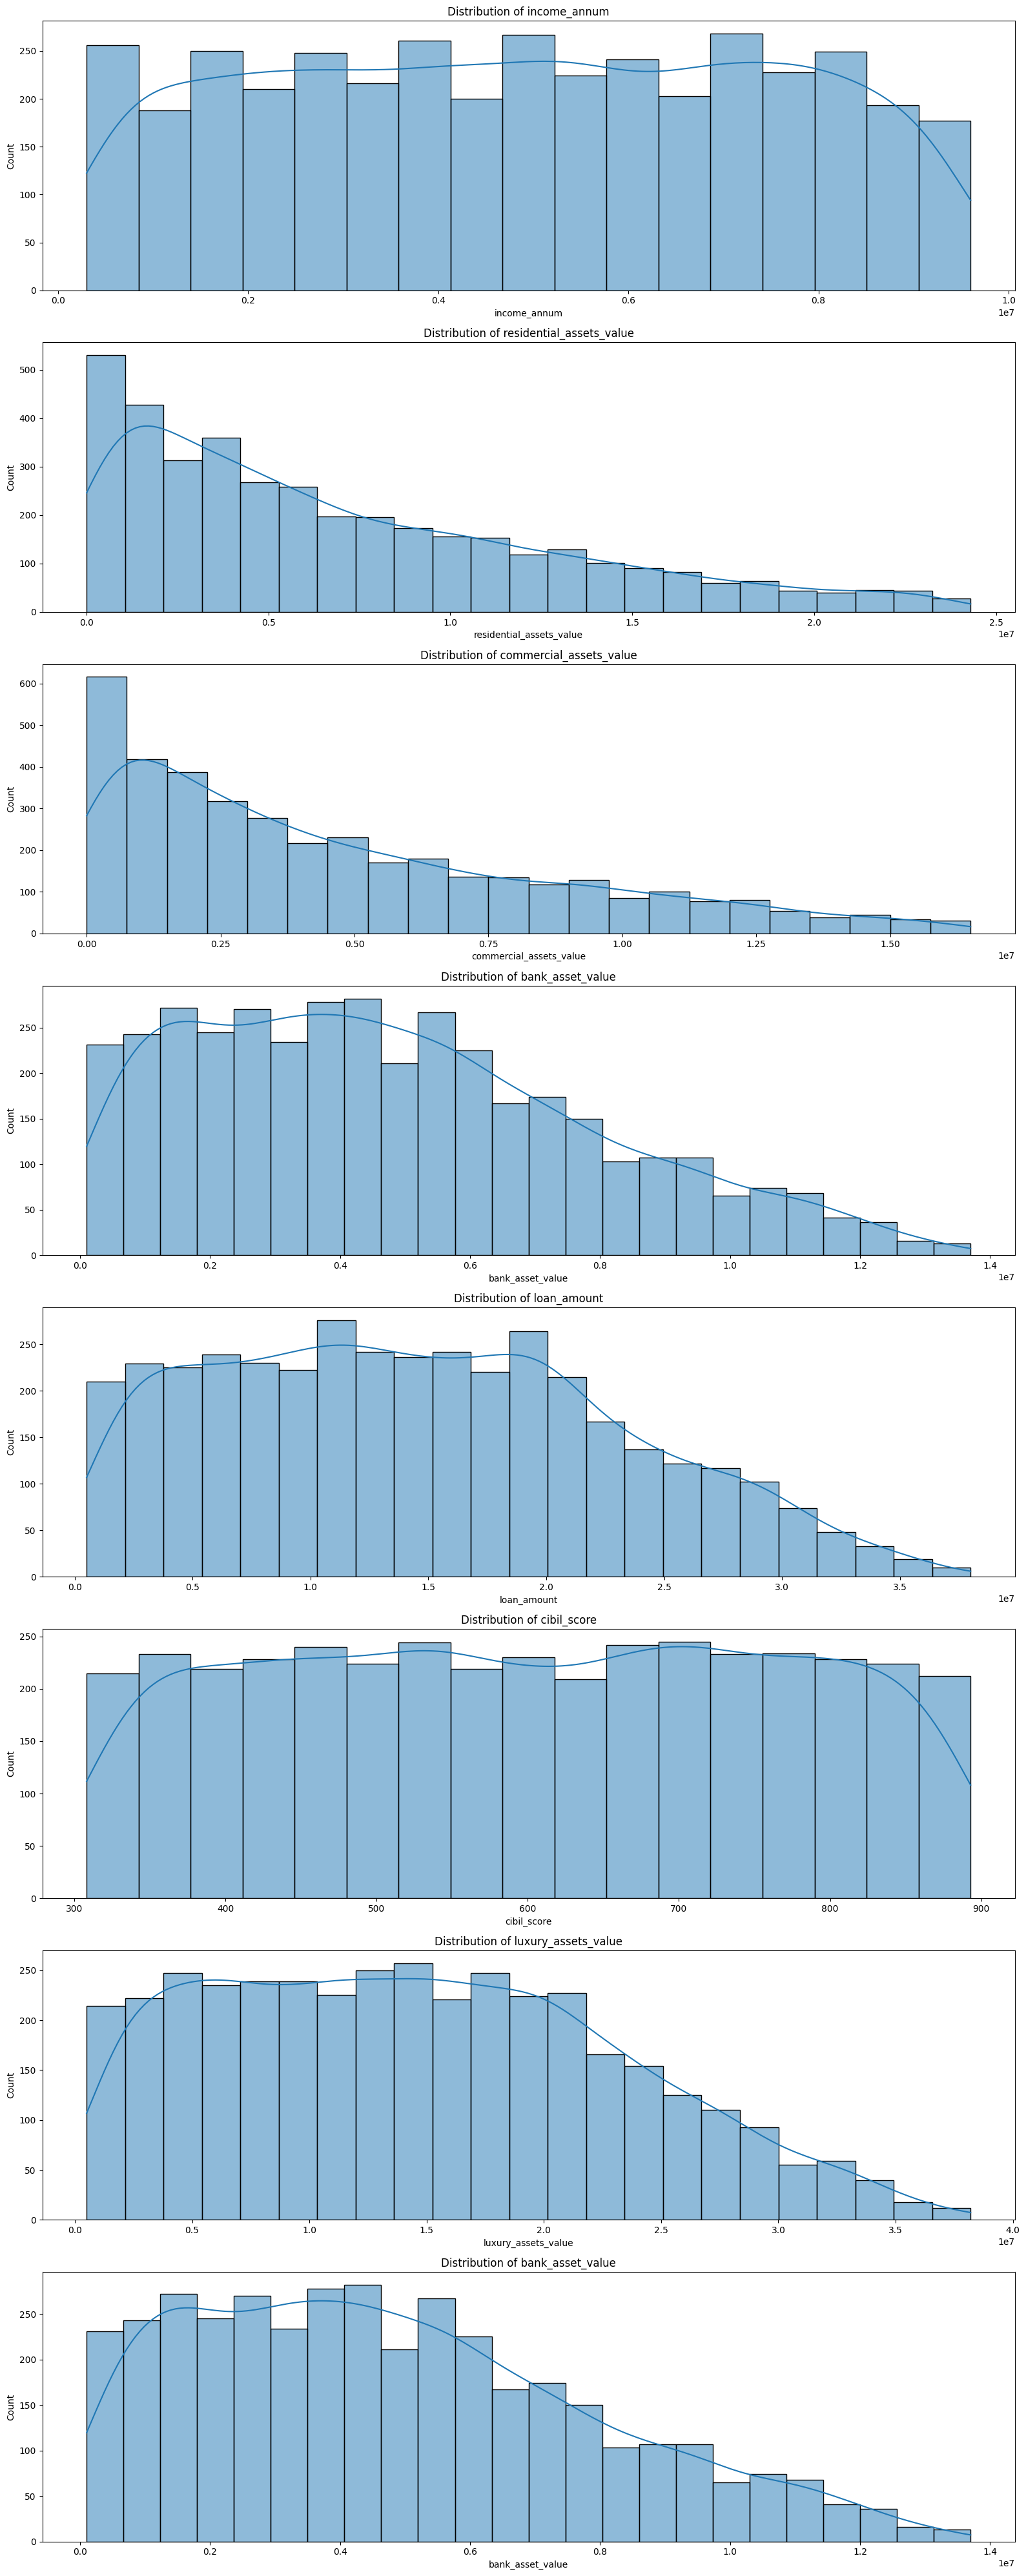

In [47]:
columns_to_plot = [
    'income_annum', 'residential_assets_value', 'commercial_assets_value',
    'bank_asset_value', 'loan_amount', 'cibil_score', 'luxury_assets_value', 'bank_asset_value'
]

plot_histograms(data_2, columns_to_plot)

In [48]:
columns_to_plot = [
    'income_annum', 'residential_assets_value', 'commercial_assets_value',
    'bank_asset_value', 'loan_amount', 'cibil_score', 'luxury_assets_value', 'bank_asset_value'
]

data_3 = remove_outliers_zscore(data_2, columns_to_plot)

print("Cleaned Data:")
print(data_3)

Analyzing column: income_annum
  Outliers detected in income_annum: 0 rows
  Remaining rows after removing outliers for income_annum: 3879
----------------------------------------
Analyzing column: residential_assets_value
  Outliers detected in residential_assets_value: 0 rows
  Remaining rows after removing outliers for residential_assets_value: 3879
----------------------------------------
Analyzing column: commercial_assets_value
  Outliers detected in commercial_assets_value: 0 rows
  Remaining rows after removing outliers for commercial_assets_value: 3879
----------------------------------------
Analyzing column: bank_asset_value
  Outliers detected in bank_asset_value: 0 rows
  Remaining rows after removing outliers for bank_asset_value: 3879
----------------------------------------
Analyzing column: loan_amount
  Outliers detected in loan_amount: 0 rows
  Remaining rows after removing outliers for loan_amount: 3879
----------------------------------------
Analyzing column: cibi

In [49]:
data_3.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [50]:
#columns_to_plot = [
 #   'income_annum', 'residential_assets_value', 'commercial_assets_value',
  #  'bank_asset_value', 'loan_amount', 'cibil_score', 'luxury_assets_value', 'bank_asset_value'
#]

#cleaned_data = data_3.copy()  

#for column in columns_to_plot:
 #   print(f"Processing column: {column}")
 #   cleaned_data = visualize_outliers(cleaned_data, column, threshold=3.0)

#print("Cleaned Data:")
#print(cleaned_data)

In [51]:
numerical_columns = [
    'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
    'residential_assets_value', 'commercial_assets_value',
    'luxury_assets_value', 'bank_asset_value'
]
categorical_columns = ['education', 'self_employed', 'loan_status']
discrete_columns = ['no_of_dependents']

data_scaled = data.copy()

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(data_scaled[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns), index=data_scaled.index)

df_encoded = pd.concat([data_scaled, one_hot_df], axis=1)

df_encoded = df_encoded.drop(columns=categorical_columns)

print(f"One-hot encoded data: \n{df_encoded.head()}")

columns_to_scale = numerical_columns + discrete_columns
scaler = StandardScaler()
df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

print(f"Fully scaled data: \n{df_encoded.head(10)}")

One-hot encoded data: 
   loan_id  no_of_dependents  income_annum  loan_amount  loan_term  \
1        2                 0       4100000     12200000          8   
2        3                 3       9100000     29700000         20   
3        4                 3       8200000     30700000          8   
4        5                 5       9800000     24200000         20   
5        6                 0       4800000     13500000         10   

   cibil_score  residential_assets_value  commercial_assets_value  \
1          417                   2700000                  2200000   
2          506                   7100000                  4500000   
3          467                  18200000                  3300000   
4          382                  12400000                  8200000   
5          319                   6800000                  8300000   

   luxury_assets_value  bank_asset_value  education_ Graduate  \
1              8800000           3300000                  0.0   
2          

In [54]:
numerical_columns = [
    'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
    'residential_assets_value', 'commercial_assets_value',
    'luxury_assets_value', 'bank_asset_value'
]
categorical_columns = ['education', 'self_employed', 'loan_status']
discrete_columns = ['no_of_dependents']

data_scaled = data.copy()

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(data_scaled[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns), index=data_scaled.index)

df_encoded = pd.concat([data_scaled, one_hot_df], axis=1)

df_encoded = df_encoded.drop(columns=categorical_columns)

print(f"One-hot encoded data: \n{df_encoded.head()}")

columns_to_scale = numerical_columns + discrete_columns
scaler = StandardScaler()
df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

print(f"Fully scaled data: \n{df_encoded.head(10)}")
df_encoded.to_csv('scaled_dataset_combined.csv', index=False)

One-hot encoded data: 
   loan_id  no_of_dependents  income_annum  loan_amount  loan_term  \
0        2                 0       4100000     12200000          8   
1        3                 3       9100000     29700000         20   
2        4                 3       8200000     30700000          8   
3        5                 5       9800000     24200000         20   
4        6                 0       4800000     13500000         10   

   cibil_score  residential_assets_value  commercial_assets_value  \
0          417                   2700000                  2200000   
1          506                   7100000                  4500000   
2          467                  18200000                  3300000   
3          382                  12400000                  8200000   
4          319                   6800000                  8300000   

   luxury_assets_value  bank_asset_value  education_ Graduate  \
0              8800000           3300000                  0.0   
1          

In [56]:
data.columns

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'education_ Graduate', 'education_ Not Graduate', 'self_employed_ No',
       'self_employed_ Yes', 'loan_status_ Approved', 'loan_status_ Rejected'],
      dtype='object')

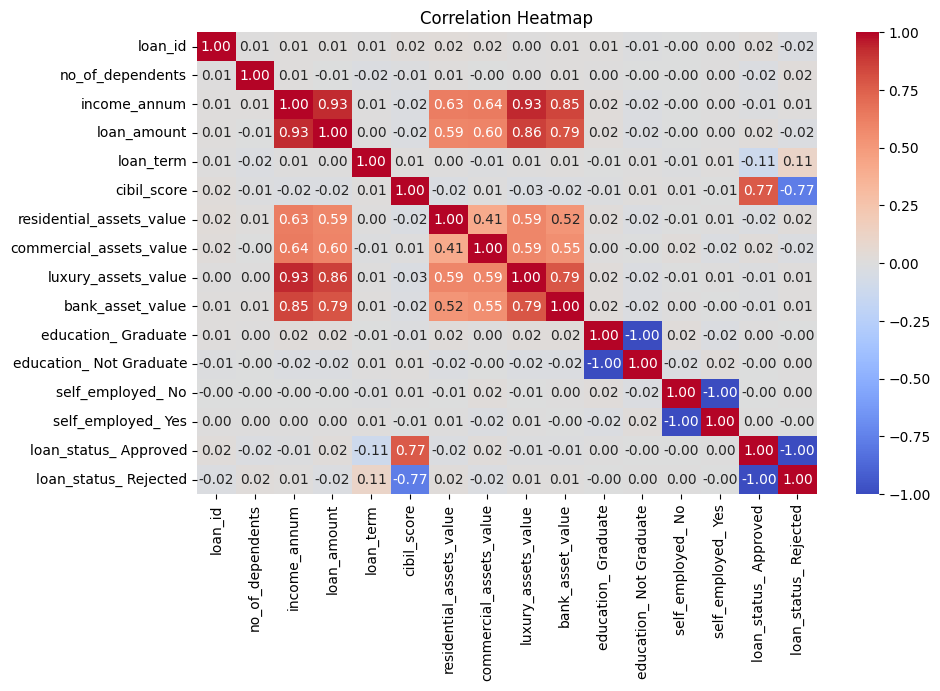

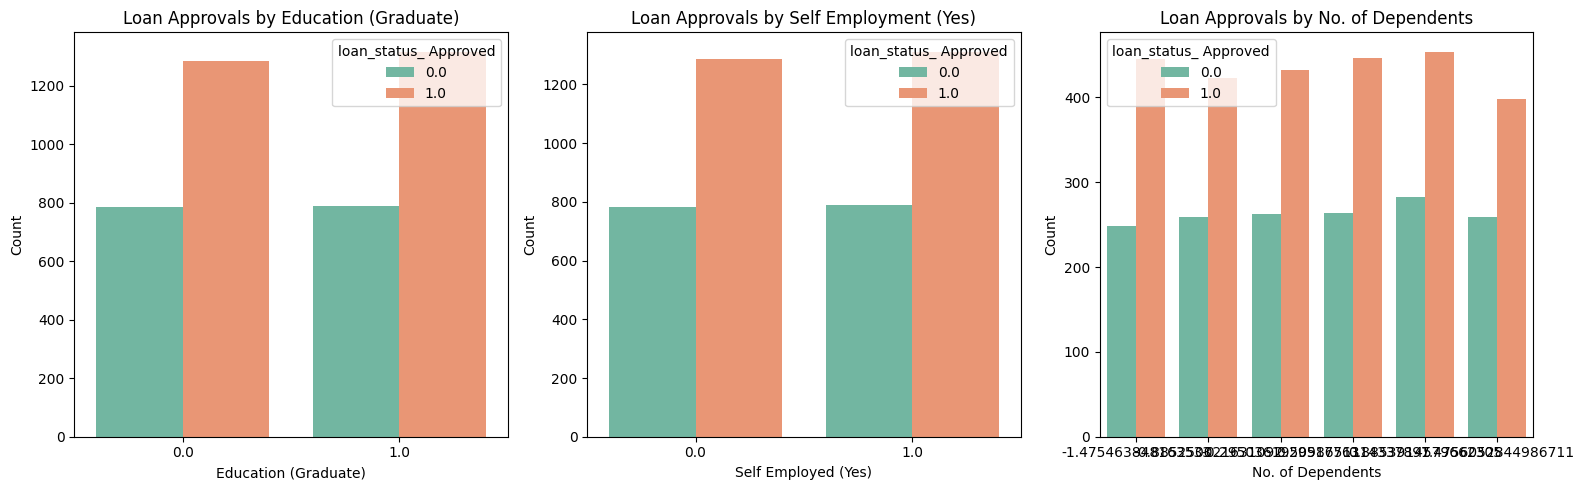

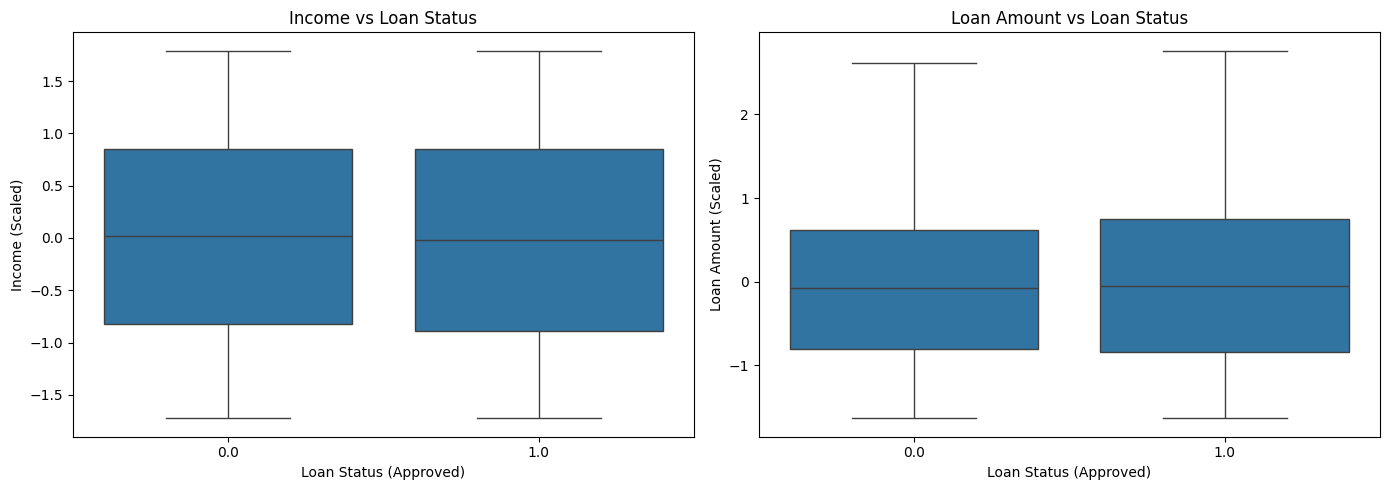

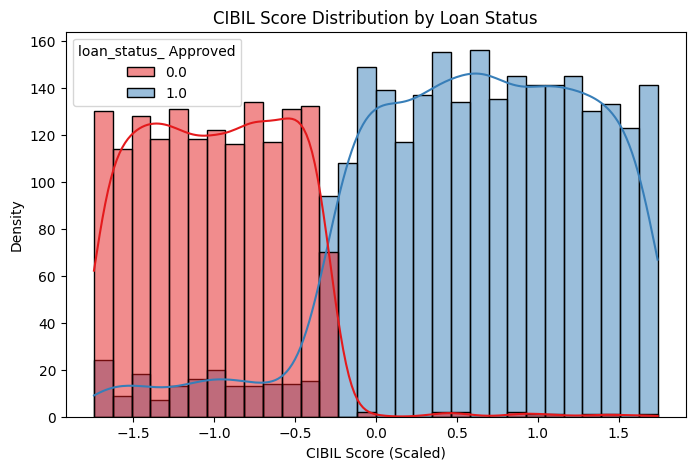

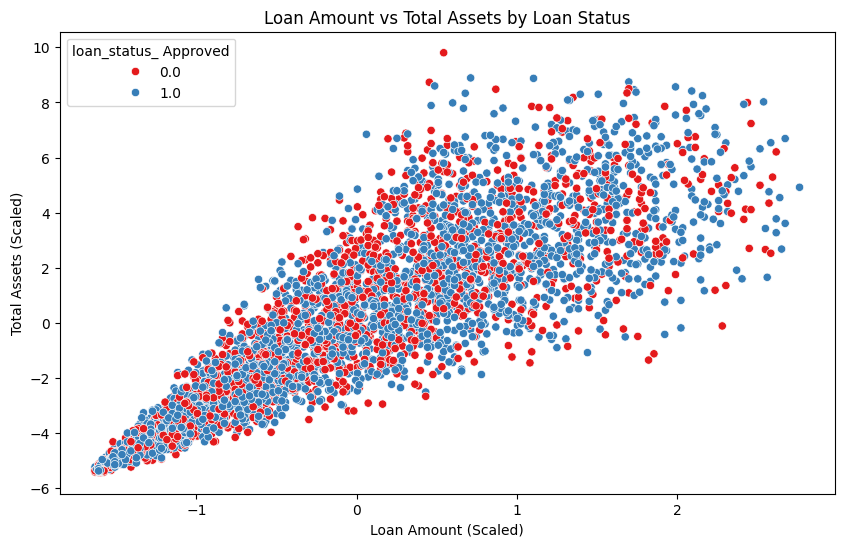

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'scaled_dataset_combined.csv'
data = pd.read_csv(file_path)

# Plot 1: Correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# Plot 2: Countplots for categorical data
plt.figure(figsize=(16, 5))

# Education vs Loan Status
plt.subplot(1, 3, 1)
sns.countplot(
    data=data,
    x='education_ Graduate',  # Adjusted for one-hot-encoded columns
    hue='loan_status_ Approved',
    palette='Set2'
)
plt.title('Loan Approvals by Education (Graduate)')
plt.xlabel('Education (Graduate)')
plt.ylabel('Count')

# Self Employed vs Loan Status
plt.subplot(1, 3, 2)
sns.countplot(
    data=data,
    x='self_employed_ Yes',  # Adjusted for one-hot-encoded columns
    hue='loan_status_ Approved',
    palette='Set2'
)
plt.title('Loan Approvals by Self Employment (Yes)')
plt.xlabel('Self Employed (Yes)')
plt.ylabel('Count')

# No of Dependents vs Loan Status
plt.subplot(1, 3, 3)
sns.countplot(
    data=data,
    x='no_of_dependents',
    hue='loan_status_ Approved',
    palette='Set2'
)
plt.title('Loan Approvals by No. of Dependents')
plt.xlabel('No. of Dependents')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Plot 3: Boxplots for numerical data
plt.figure(figsize=(14, 5))

# Income vs Loan Status
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='loan_status_ Approved', y='income_annum')
plt.title('Income vs Loan Status')
plt.xlabel('Loan Status (Approved)')
plt.ylabel('Income (Scaled)')

# Loan Amount vs Loan Status
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='loan_status_ Approved', y='loan_amount')
plt.title('Loan Amount vs Loan Status')
plt.xlabel('Loan Status (Approved)')
plt.ylabel('Loan Amount (Scaled)')

plt.tight_layout()
plt.show()

# Plot 4: Histogram of CIBIL Score
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='cibil_score', hue='loan_status_ Approved', kde=True, bins=30, palette='Set1')
plt.title('CIBIL Score Distribution by Loan Status')
plt.xlabel('CIBIL Score (Scaled)')
plt.ylabel('Density')
plt.show()

# Feature engineering: Total Assets
data['total_assets'] = (
    data['residential_assets_value']
    + data['commercial_assets_value']
    + data['luxury_assets_value']
    + data['bank_asset_value']
)

# Plot 5: Scatterplot of Loan Amount vs Total Assets
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='loan_amount', y='total_assets', hue='loan_status_ Approved', palette='Set1')
plt.title('Loan Amount vs Total Assets by Loan Status')
plt.xlabel('Loan Amount (Scaled)')
plt.ylabel('Total Assets (Scaled)')
plt.show()


In [58]:
data.columns

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'education_ Graduate', 'education_ Not Graduate', 'self_employed_ No',
       'self_employed_ Yes', 'loan_status_ Approved', 'loan_status_ Rejected',
       'total_assets'],
      dtype='object')

Training Logistic Regression...

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       315
         1.0       0.93      0.93      0.93       520

    accuracy                           0.91       835
   macro avg       0.90      0.90      0.90       835
weighted avg       0.91      0.91      0.91       835



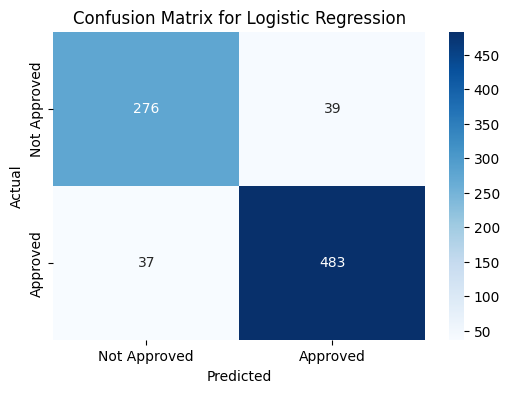

Training Decision Tree...

Classification Report for Decision Tree:

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       315
         1.0       0.98      0.98      0.98       520

    accuracy                           0.98       835
   macro avg       0.98      0.98      0.98       835
weighted avg       0.98      0.98      0.98       835



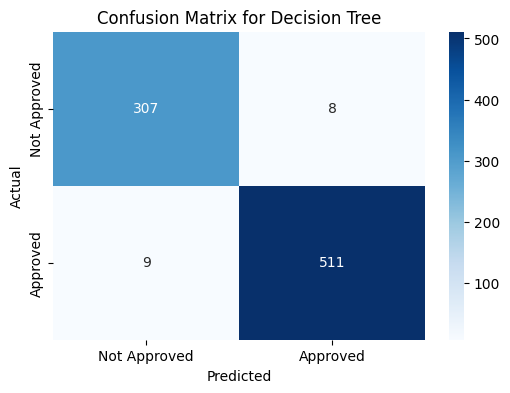

Training Random Forest...

Classification Report for Random Forest:

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       315
         1.0       0.98      0.99      0.99       520

    accuracy                           0.98       835
   macro avg       0.98      0.98      0.98       835
weighted avg       0.98      0.98      0.98       835



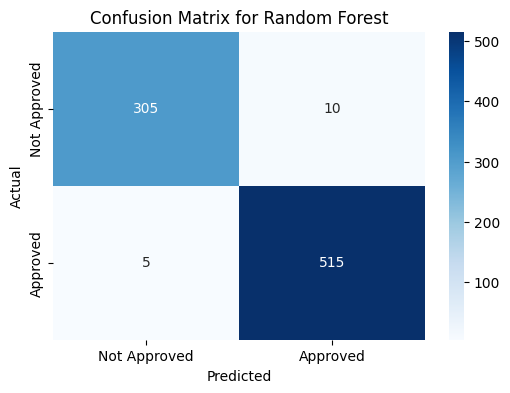

Training XGBoost...


C:\Users\Aritro Saha\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:00:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report for XGBoost:

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       315
         1.0       0.98      0.98      0.98       520

    accuracy                           0.98       835
   macro avg       0.98      0.98      0.98       835
weighted avg       0.98      0.98      0.98       835



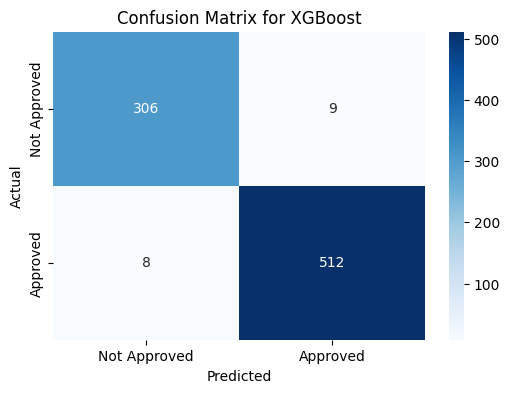

Training SVM...

Classification Report for SVM:

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       315
         1.0       0.95      0.96      0.96       520

    accuracy                           0.95       835
   macro avg       0.94      0.94      0.94       835
weighted avg       0.95      0.95      0.95       835



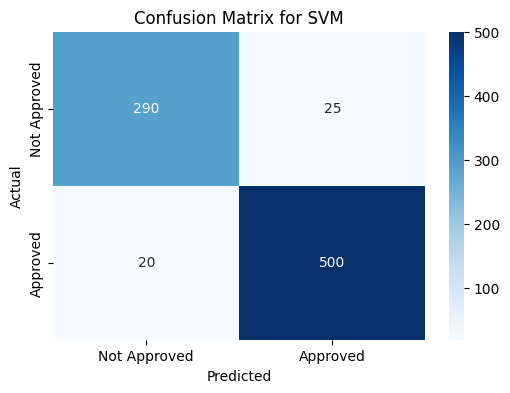

Training Neural Network...


C:\Users\Aritro Saha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



Classification Report for Neural Network:

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       315
         1.0       0.98      0.98      0.98       520

    accuracy                           0.98       835
   macro avg       0.98      0.97      0.97       835
weighted avg       0.98      0.98      0.98       835



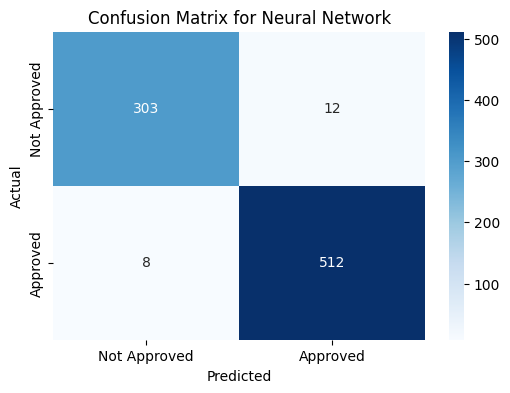


Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.908982   0.925287  0.928846  0.927063  0.969664
1        Decision Tree  0.979641   0.984586  0.982692  0.983638  0.978648
2        Random Forest  0.982036   0.980952  0.990385  0.985646  0.998111
3              XGBoost  0.979641   0.982726  0.984615  0.983670  0.998645
4                  SVM  0.946108   0.952381  0.961538  0.956938  0.986496
5       Neural Network  0.976048   0.977099  0.984615  0.980843  0.997448


In [60]:
file_path = 'scaled_dataset_combined.csv'
data = pd.read_csv(file_path)

data['loan_status'] = data['loan_status_ Approved']  

X = data[
    [
        'no_of_dependents', 'education_ Graduate', 'self_employed_ Yes',
        'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
        'residential_assets_value', 'commercial_assets_value',
        'luxury_assets_value', 'bank_asset_value'
    ]
]
y = data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

results = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    cm = confusion_matrix(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(6, 4))
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=['Not Approved', 'Approved'],
        yticklabels=['Not Approved', 'Approved']
    )
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

results_df = pd.DataFrame(results)

print("\nModel Performance Comparison:")
print(results_df)

results_df.to_csv('model_comparison_results.csv', index=False)

In [61]:
treebagged_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),  
    n_estimators=50,  
    random_state=42
)

models['TreeBagged'] = treebagged_clf

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    cm = confusion_matrix(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(cm)


Training Logistic Regression...
Model: Logistic Regression
Accuracy: 0.9090
Precision: 0.9253
Recall: 0.9288
F1-Score: 0.9271
ROC-AUC: 0.9697
Confusion Matrix:
[[276  39]
 [ 37 483]]

Training Decision Tree...
Model: Decision Tree
Accuracy: 0.9796
Precision: 0.9846
Recall: 0.9827
F1-Score: 0.9836
ROC-AUC: 0.9786
Confusion Matrix:
[[307   8]
 [  9 511]]

Training Random Forest...
Model: Random Forest
Accuracy: 0.9820
Precision: 0.9810
Recall: 0.9904
F1-Score: 0.9856
ROC-AUC: 0.9981
Confusion Matrix:
[[305  10]
 [  5 515]]

Training XGBoost...


C:\Users\Aritro Saha\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:01:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
Accuracy: 0.9796
Precision: 0.9827
Recall: 0.9846
F1-Score: 0.9837
ROC-AUC: 0.9986
Confusion Matrix:
[[306   9]
 [  8 512]]

Training SVM...
Model: SVM
Accuracy: 0.9461
Precision: 0.9524
Recall: 0.9615
F1-Score: 0.9569
ROC-AUC: 0.9865
Confusion Matrix:
[[290  25]
 [ 20 500]]

Training Neural Network...


C:\Users\Aritro Saha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: Neural Network
Accuracy: 0.9760
Precision: 0.9771
Recall: 0.9846
F1-Score: 0.9808
ROC-AUC: 0.9974
Confusion Matrix:
[[303  12]
 [  8 512]]

Training TreeBagged...
Model: TreeBagged
Accuracy: 0.9856
Precision: 0.9847
Recall: 0.9923
F1-Score: 0.9885
ROC-AUC: 0.9989
Confusion Matrix:
[[307   8]
 [  4 516]]


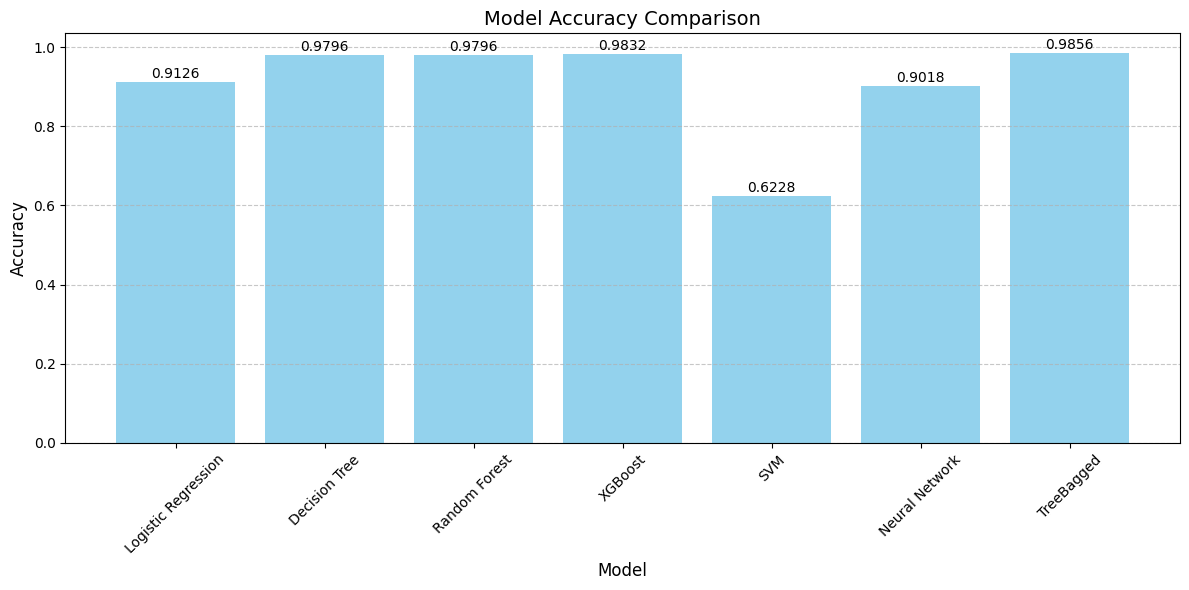

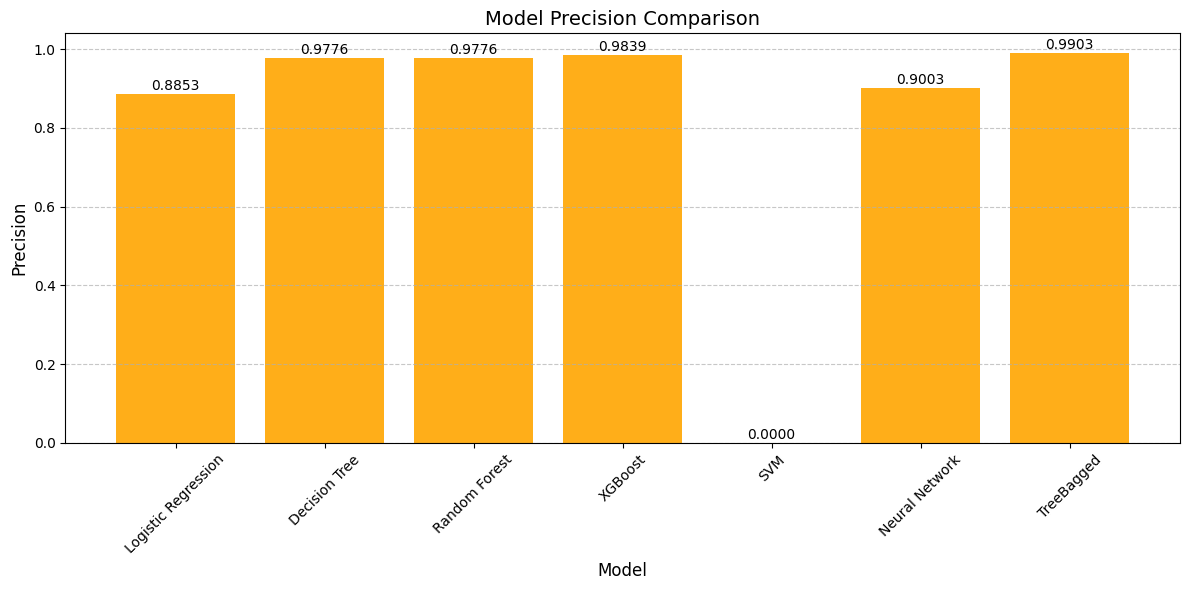

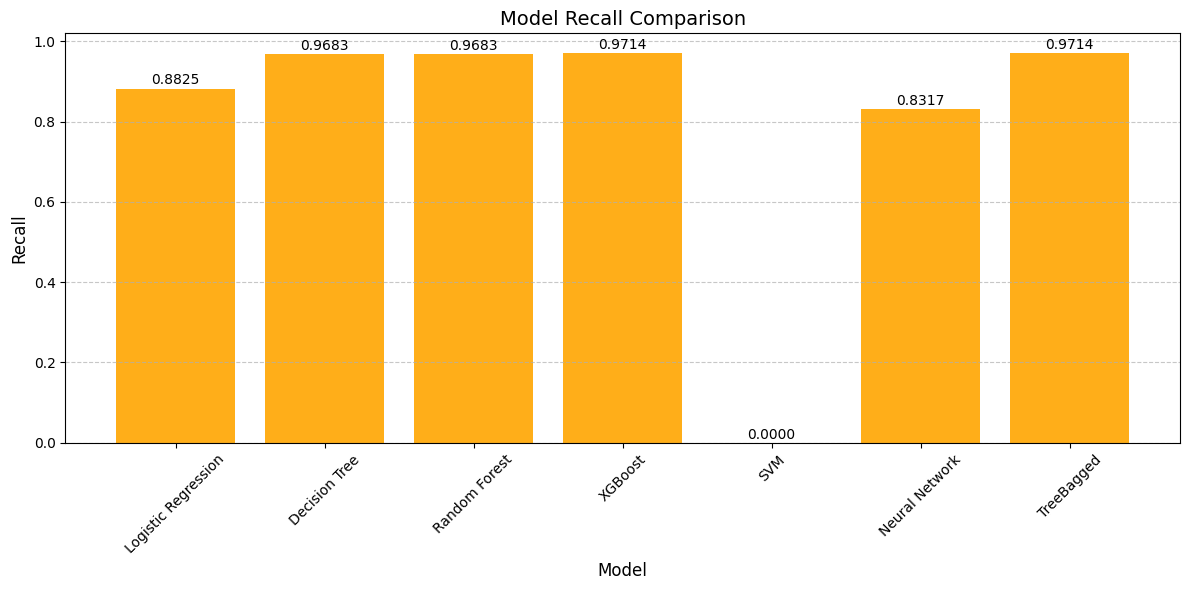

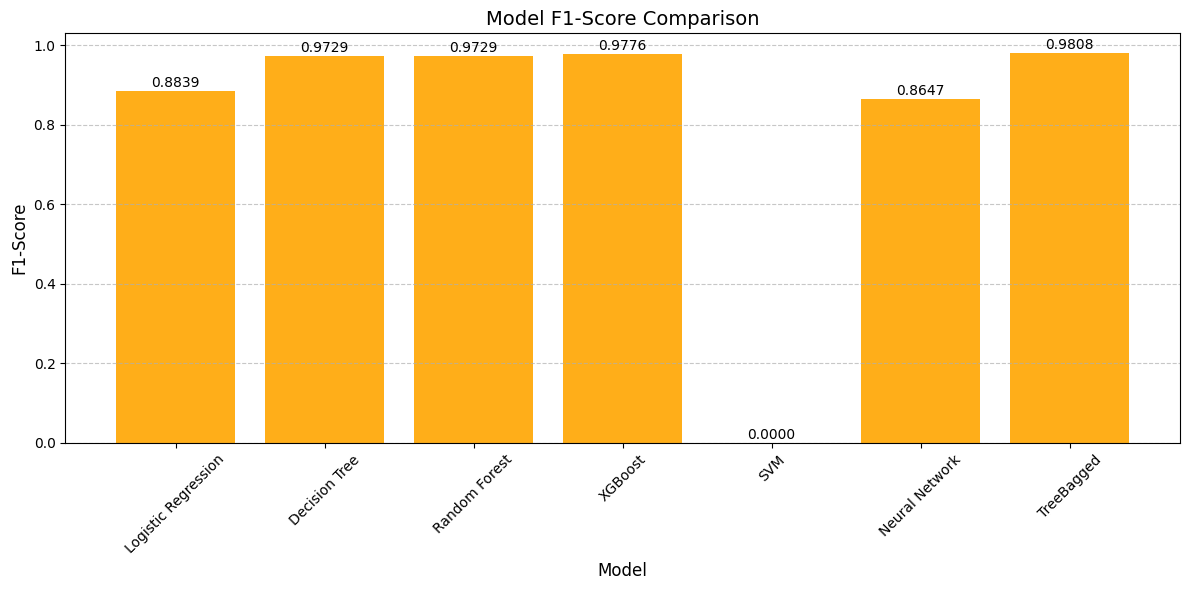

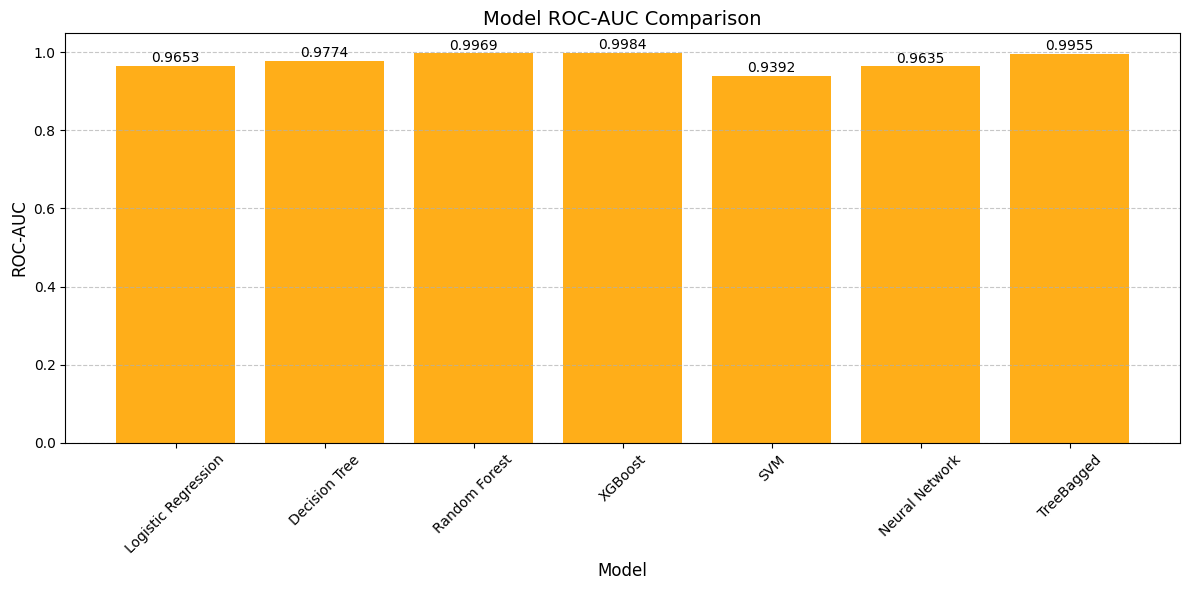

In [62]:
results_df = pd.DataFrame({
    'Model': [
        'Logistic Regression', 
        'Decision Tree', 
        'Random Forest', 
        'XGBoost', 
        'SVM', 
        'Neural Network', 
        'TreeBagged'
    ],
    'Accuracy': [0.912575, 0.979641, 0.979641, 0.983234, 0.622754, 0.901796, 0.9856],
    'Precision': [0.885350, 0.977564, 0.977564, 0.983923, 0.000000, 0.900344, 0.9903],
    'Recall': [0.882540, 0.968254, 0.968254, 0.971429, 0.000000, 0.831746, 0.9714],
    'F1-Score': [0.883943, 0.972887, 0.972887, 0.977636, 0.000000, 0.864686, 0.9808],
    'ROC-AUC': [0.965311, 0.977396, 0.996923, 0.998400, 0.939151, 0.963541, 0.9955]
})

plt.figure(figsize=(12, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue', alpha=0.9, label='Accuracy')
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(results_df['Accuracy']):
    plt.text(i, value + 0.01, f"{value:.4f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

metrics = ['Precision', 'Recall', 'F1-Score', 'ROC-AUC']
for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.bar(results_df['Model'], results_df[metric], color='orange', alpha=0.9, label=metric)
    plt.title(f'Model {metric} Comparison', fontsize=14)
    plt.xlabel('Model', fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for i, value in enumerate(results_df[metric]):
        plt.text(i, value + 0.01, f"{value:.4f}", ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()

In [64]:
data = pd.read_csv("scaled_dataset_combined.csv")

data.columns = data.columns.str.strip()

if 'loan_status' in data.columns:
    label_encoder = LabelEncoder()
    data['loan_status_encoded'] = label_encoder.fit_transform(data['loan_status'])
else:
    raise ValueError("'loan_status' column is missing from the dataset.")

columns_to_plot = [
    'income_annum', 'residential_assets_value', 'commercial_assets_value',
    'bank_asset_value', 'loan_amount', 'cibil_score', 'luxury_assets_value'
]

results = {}

for column in columns_to_plot:
    if column in data.columns:
        group_0 = data[data['loan_status_encoded'] == 0][column].dropna()  
        group_1 = data[data['loan_status_encoded'] == 1][column].dropna()  

        if len(group_0) > 1 and len(group_1) > 1:
            stat, p_value = kruskal(group_0, group_1)
            results[column] = {'H-statistic': stat, 'p-value': p_value}
        else:
            results[column] = {'H-statistic': None, 'p-value': None}
    else:
        results[column] = {'H-statistic': None, 'p-value': None}

results_df = pd.DataFrame(results).T

print("Kruskal-Wallis Test Results:")
print(results_df)

significant_results = results_df[results_df['p-value'] < 0.05]
print("\nSignificant Features (p-value < 0.05):")
print(significant_results)

ValueError: 'loan_status' column is missing from the dataset.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

treebagged_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
treebagged_clf.fit(X_train, y_train)

y_pred = treebagged_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rejected', 'Approved'])
disp.plot(cmap='Blues', values_format='d')
disp.ax_.set_title('Confusion Matrix for TreeBagged Model')

print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
X = df.drop(columns=['loan_status','loan_status_encoded'])
y = df['loan_status_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

models = {
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'TreeBagged': BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
}

plt.figure(figsize=(10, 7))

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_proba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')
plt.title('ROC Curve Analysis for All Models')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

In [ ]:
data.head(20)